In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [40]:
simulation_fname = "../test/no_vaccination/output/compartments_full.nc"
sim_xa = xr.load_dataarray(simulation_fname)
sim_xa = sim_xa.transpose()

agg_sim_xa = sim_xa.sum(['G', 'M', 'V'])

infected_compartments = ['E', 'A', 'I', 'PH', 'PD', 'HR', 'HD', 'R', 'D']
prevalence = agg_sim_xa.loc[:, infected_compartments].sum("epi_states").to_pandas()
prevalence.index = pd.to_datetime(prevalence.index, dayfirst=False)

incidence = agg_sim_xa.loc[:, ['I']].sum("epi_states").to_pandas()
incidence.index = pd.to_datetime(incidence.index, dayfirst=False)

defunctions = agg_sim_xa.loc[:, ['D']].sum("epi_states").to_pandas()
defunctions.index = pd.to_datetime(defunctions.index, dayfirst=False)

In [41]:
# re
df_casos_hosp_uci_def = pd.read_csv('../data/casos_hosp_uci_def_sexo_edad_provres.csv')

mask = df_casos_hosp_uci_def['fecha'] >= '2020-02-15'
mask &= df_casos_hosp_uci_def['fecha'] <= '2020-05-30'
df_casos_hosp_uci_def = df_casos_hosp_uci_def[mask]

df_casos_hosp_uci_def.loc[:, 'fecha'] = pd.to_datetime(df_casos_hosp_uci_def['fecha'], dayfirst=False)

df_num_casos = df_casos_hosp_uci_def[['fecha', 'num_casos']].groupby('fecha').sum()
df_AI14 = df_num_casos.rolling(min_periods=1, window=7).sum() 

df_num_def = df_casos_hosp_uci_def[['fecha', 'num_def']].groupby('fecha').sum()

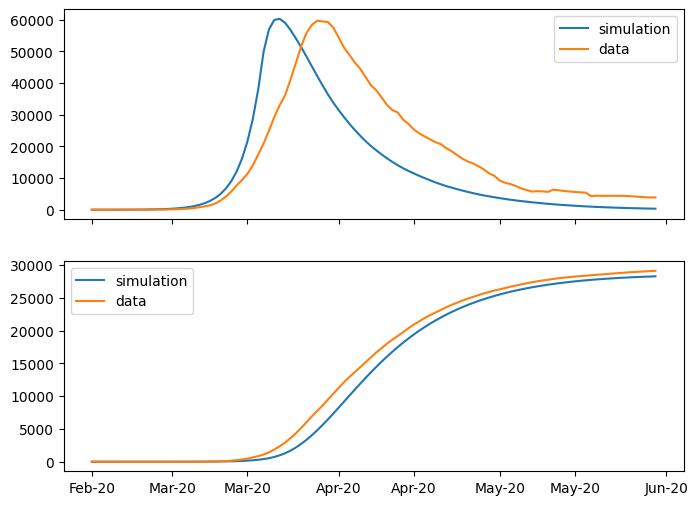

In [53]:
scale_inf = 0.135
scale_deah = 1.25

sim_incidence =  pd.DataFrame(incidence.copy(), columns=['cases']) * scale_inf
defunctions_sim = defunctions.copy() * scale_deah

fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True)

axes[0].plot(sim_incidence, label="simulation")
axes[0].plot(df_AI14, label="data")
axes[0].legend()

axes[1].plot(defunctions_sim, label="simulation")
axes[1].plot(df_num_def.cumsum(), label="data")
axes[1].legend()

axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

In [3]:
text_vacc = sim_xa.sum(['G', 'M'])
first_date = text_vacc.coords['T'].values[3]
text_vacc.loc[first_date, 'V', :].to_pandas()

epi_states
S     0.284551
E     0.000000
A     0.000000
I     0.000000
PH    0.000000
PD    0.000000
HR    0.000000
HD    0.000000
R     0.000000
D     0.000000
dtype: float64